# Education Cost-Benefit Analysis

---

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

In [2]:
graduate_data = pd.read_csv("payscaleAlumni.csv")
graduate_data.head()

,Rank,School Name,School Type,Early Career Pay,Mid-Career Pay,% High Meaning,% STEM Degrees
0,1,Stanford University,"Private School, Research University, For Sport...",77200,154700,0.60,0.49
1,2,Harvey Mudd College,"Engineering, Liberal Arts School, Private School",82400,153400,0.59,0.85
2,3 (tie),California Institute of Technology,"Engineering, Private School, Research University",82000,152400,0.58,0.97
3,3 (tie),Massachusetts Institute of Technology,"Engineering, Private School, Research University",84300,152400,0.57,0.69
4,5,Princeton University,"Ivy League, Private School, Research Universit...",71000,151900,0.51,0.47


In [3]:
# % STEM Degrees = % degrees awarded in science, technology, engineering or math subjects
# Our question: Do STEM degrees pay more than non-STEM degrees both in the short-term and long-term? 
# Dataset: "Payscale Alumni"
# group_names = ["Not STEM (0-25%)", "Moderately STEM (25-50%)", "Mostly STEM (50-75%)", "STEM (75-100%)"]
bins = [0, 0.25, 0.5, 0.75, 1]
group_names = ["0-25%", "25-50%", "50-75%", "75-100%"]
graduate_data["% STEM"] = pd.cut(graduate_data["% STEM Degrees"], bins, labels = group_names)
graduate_data.head()

,Rank,School Name,School Type,Early Career Pay,Mid-Career Pay,% High Meaning,% STEM Degrees,% STEM
0,1,Stanford University,"Private School, Research University, For Sport...",77200,154700,0.60,0.49,25-50%
1,2,Harvey Mudd College,"Engineering, Liberal Arts School, Private School",82400,153400,0.59,0.85,75-100%
2,3 (tie),California Institute of Technology,"Engineering, Private School, Research University",82000,152400,0.58,0.97,75-100%
3,3 (tie),Massachusetts Institute of Technology,"Engineering, Private School, Research University",84300,152400,0.57,0.69,50-75%
4,5,Princeton University,"Ivy League, Private School, Research Universit...",71000,151900,0.51,0.47,25-50%


In [4]:
agg_df = graduate_data.groupby("% STEM")
early_career_median = agg_df["Early Career Pay"].median()

In [5]:
mid_career_median = agg_df["Mid-Career Pay"].median()

In [6]:
summary_df = pd.DataFrame({"Early Career Pay (Median)": early_career_median, 
                           "Mid-Career Pay (Median)": mid_career_median})

<IPython.core.display.Javascript object>


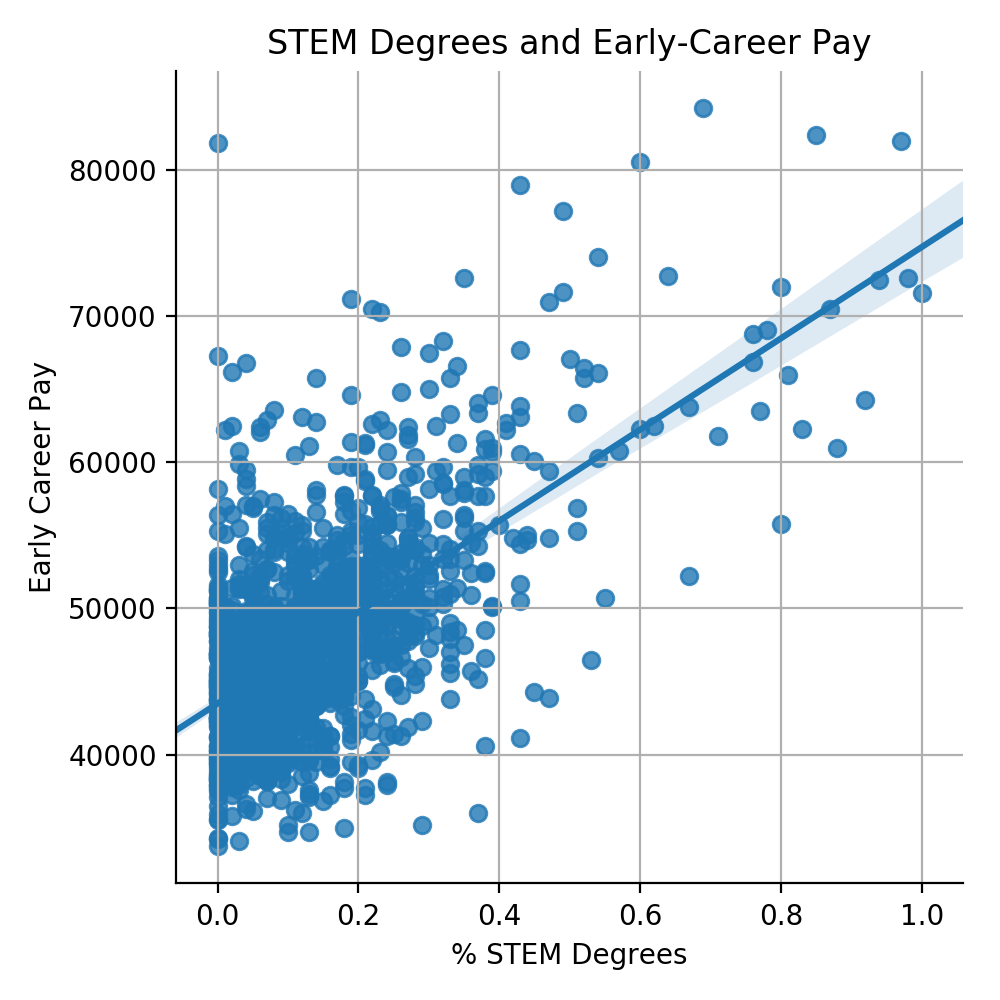

In [7]:
#Scatter plots for % STEM vs. Early & Mid-Career Pay
import seaborn as sns
#colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
#palletes = "coral"
sns.lmplot(x='% STEM Degrees',y='Early Career Pay', data=graduate_data, fit_reg=True) 
plt.title("STEM Degrees and Early-Career Pay")
plt.grid()
plt.tight_layout()
plt.savefig("Images/STEM Degrees and Early-Career Pay (Seaborn).png")
plt.show()

<IPython.core.display.Javascript object>


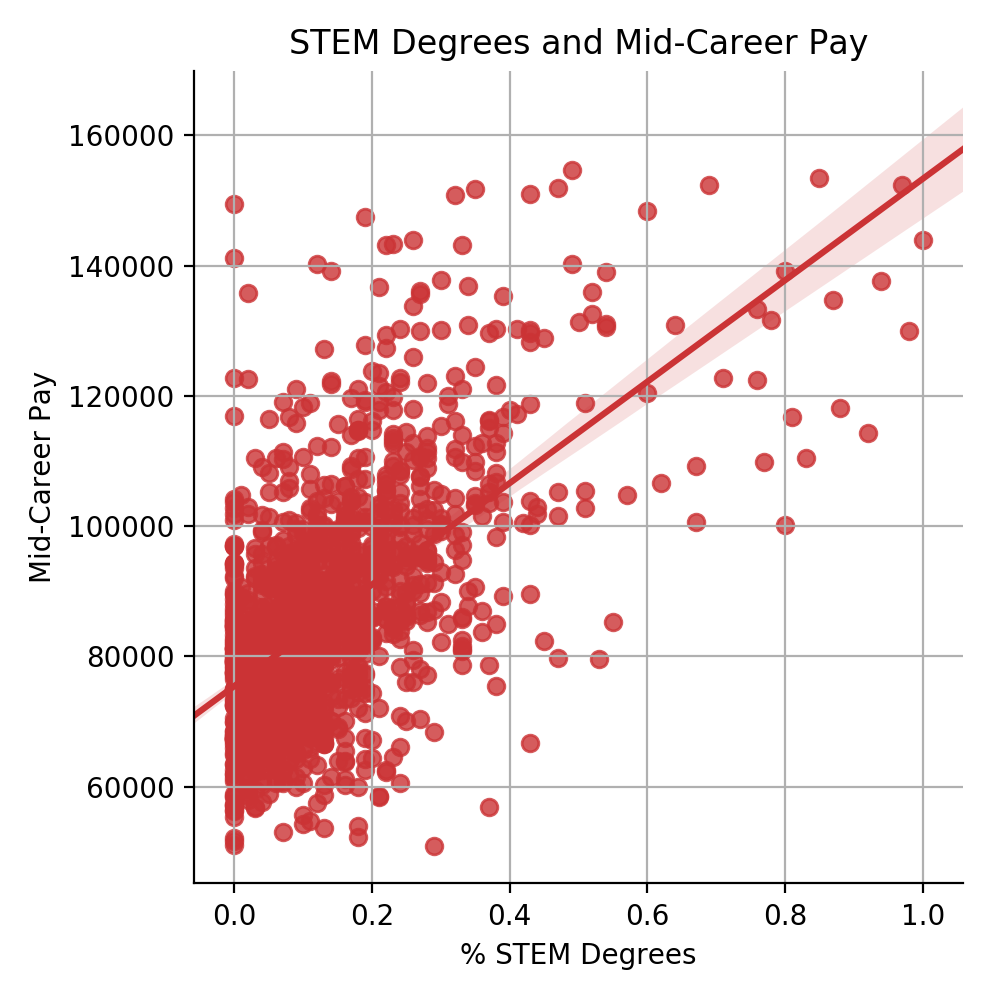

In [8]:
import seaborn as sns
sns.set_palette("Set1", 8, .75)
sns.lmplot(x='% STEM Degrees',y='Mid-Career Pay',data=graduate_data,fit_reg=True) 
plt.title("STEM Degrees and Mid-Career Pay")
plt.grid()
plt.tight_layout()
plt.savefig("Images/STEM Degrees and Mid-Career Pay (Seaborn).png")

plt.show()

<IPython.core.display.Javascript object>


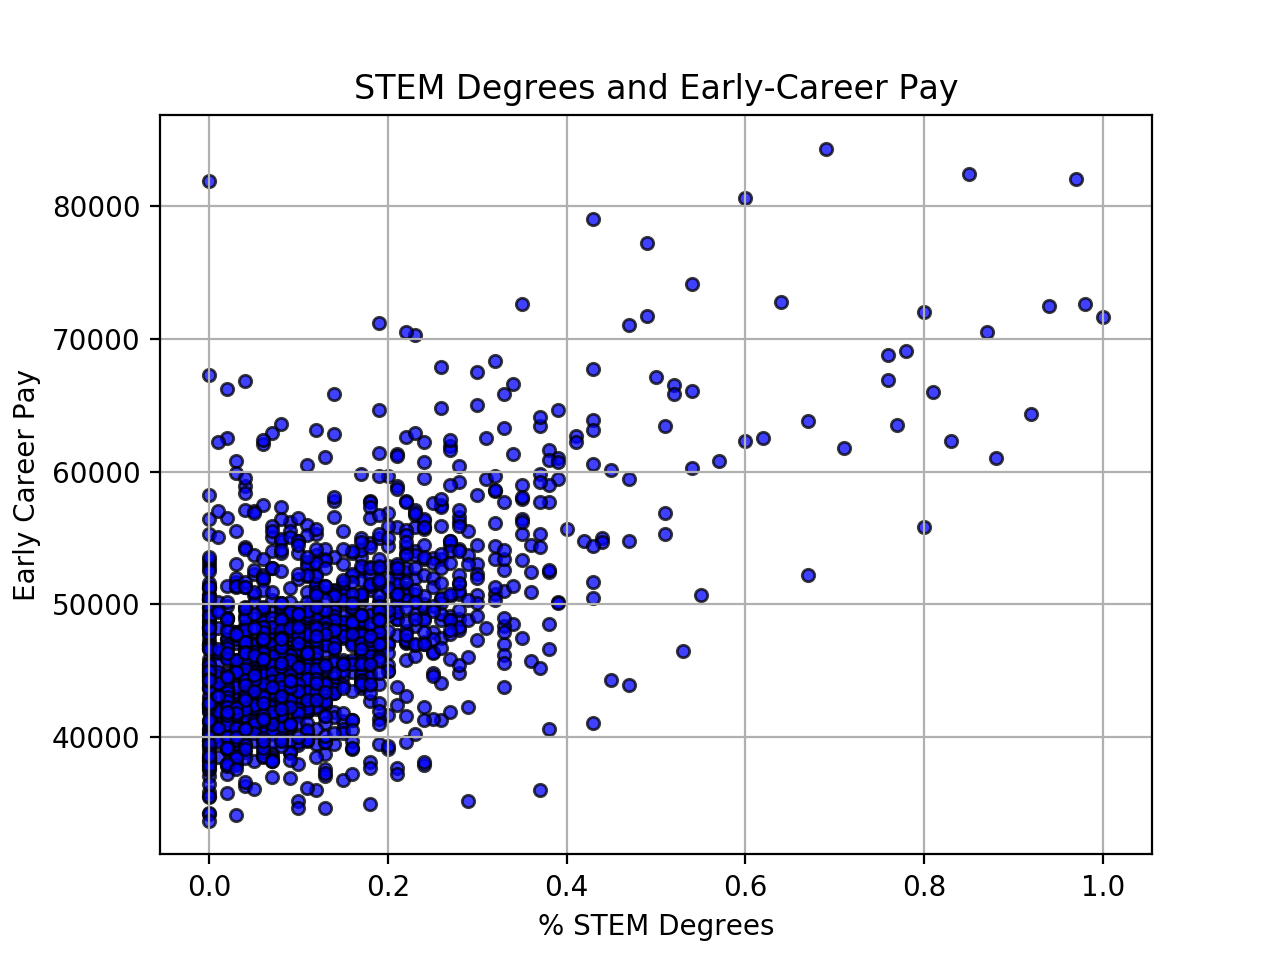

<IPython.core.display.Javascript object>


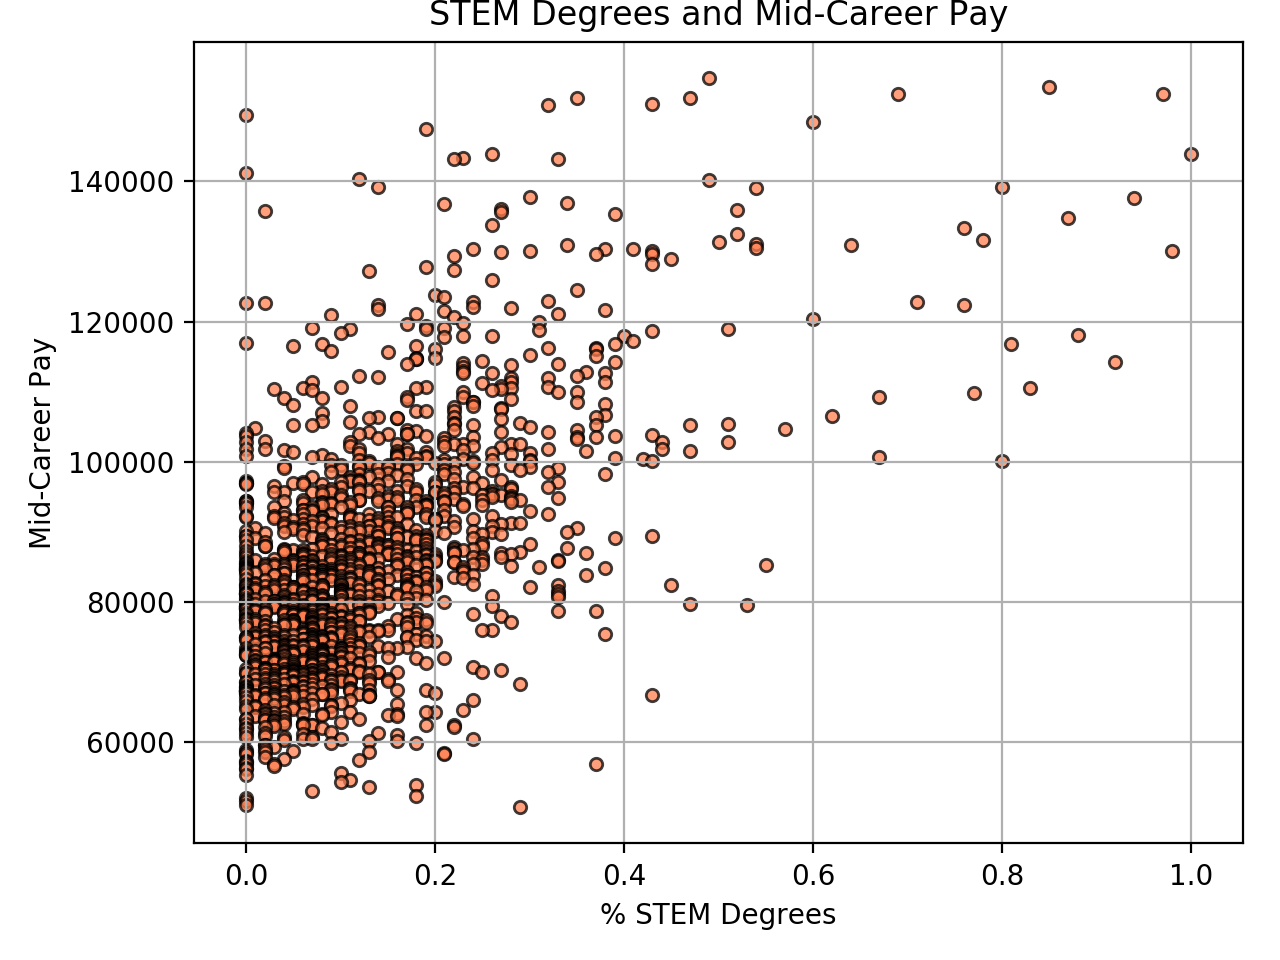

In [9]:
ax1 = graduate_data.plot.scatter(x = "% STEM Degrees", y = "Early Career Pay", 
                            color = "blue", alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.title("STEM Degrees and Early-Career Pay")
plt.savefig("Images/STEM Degrees and Early-Career Pay.png")
plt.show()

ax2 = graduate_data.plot.scatter(x = "% STEM Degrees", y = "Mid-Career Pay", 
                            color = "coral", alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.grid()
plt.tight_layout()
plt.title("STEM Degrees and Mid-Career Pay")
plt.savefig("Images/STEM Degrees and Mid-Career Pay.png")
plt.show()


<IPython.core.display.Javascript object>


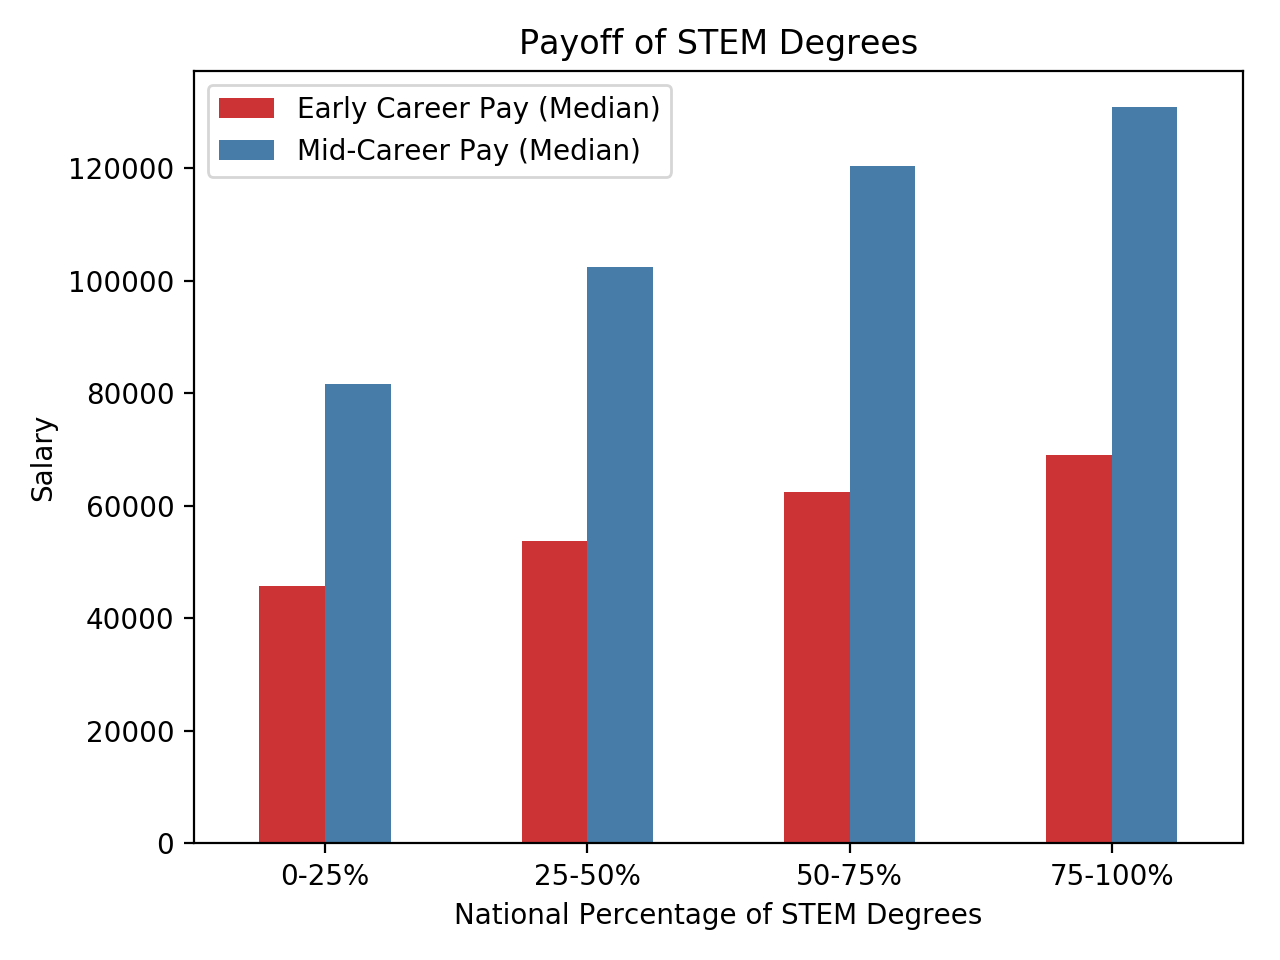

In [10]:
#Bar graph
bar_chart = summary_df.plot(kind = "bar")
plt.title("Payoff of STEM Degrees")
plt.xlabel("National Percentage of STEM Degrees")
plt.ylabel("Salary")
plt.xticks(rotation=0)
#plt.grid()
plt.tight_layout()
plt.savefig("Images/Payoff of STEM Degrees.png")
plt.show()